# **EDA** : Haberman's Cancer Survival Dataset

---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df=pd.read_csv("haberman.csv")
df.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
columnNamesList = ["PatientAge", "PatientYearOperation", "NumberAxillaryNodes", "SurvivalStatus"]
df=pd.read_csv("haberman.csv",names=columnNamesList)
df.head()

,PatientAge,PatientYearOperation,NumberAxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   PatientAge            306 non-null    int64
 1   PatientYearOperation  306 non-null    int64
 2   NumberAxillaryNodes   306 non-null    int64
 3   SurvivalStatus        306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,PatientAge,PatientYearOperation,NumberAxillaryNodes,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
df.SurvivalStatus.value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

# **Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data

PDF(probability density function)

In [ ]:
sn.FacetGrid(df, hue = "SurvivalStatus", height= 5).map(sn.distplot, "PatientAge").add_legend()
plt.title("Histogram of PatientAge")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


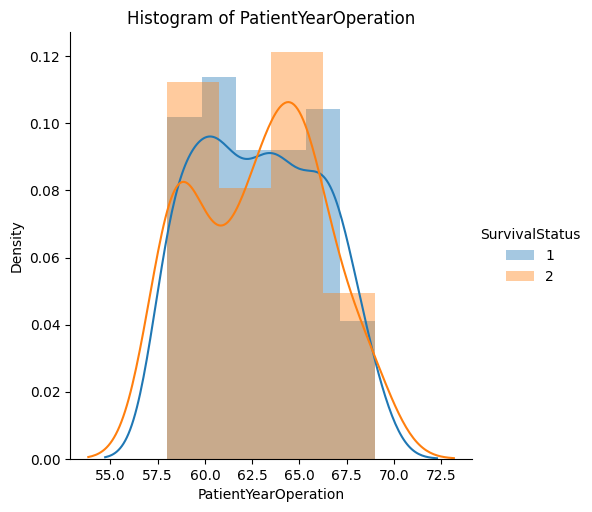

In [ ]:
sn.FacetGrid(df, hue = "SurvivalStatus", height = 5). map(sn.distplot, "PatientYearOperation").add_legend()
plt.title("Histogram of PatientYearOperation")
plt.ylabel("Density")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


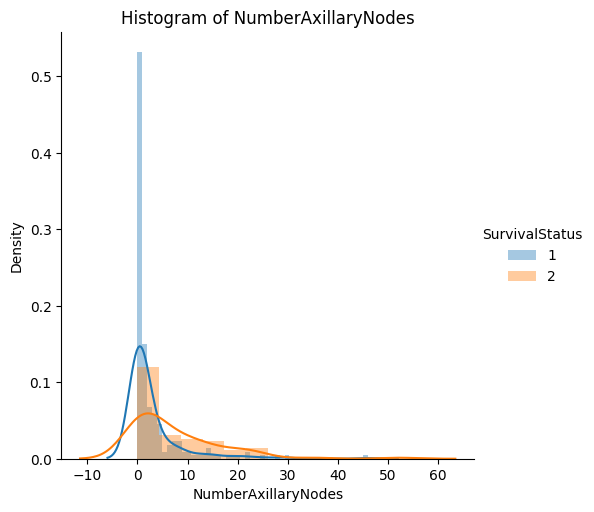

In [ ]:
sn.FacetGrid(df, hue = "SurvivalStatus", height= 5).map(sn.distplot, "NumberAxillaryNodes").add_legend()
plt.title("Histogram of NumberAxillaryNodes")
plt.ylabel("Density")
plt.show()

observations

1. In all the plots the features are overlapping each other massively. But somehow we can say
2. probabily 58% people survived who had 0-5 	NumberAxillaryNodes  and 12% died as well.


**CDF(Cummulative Distributed Function)**


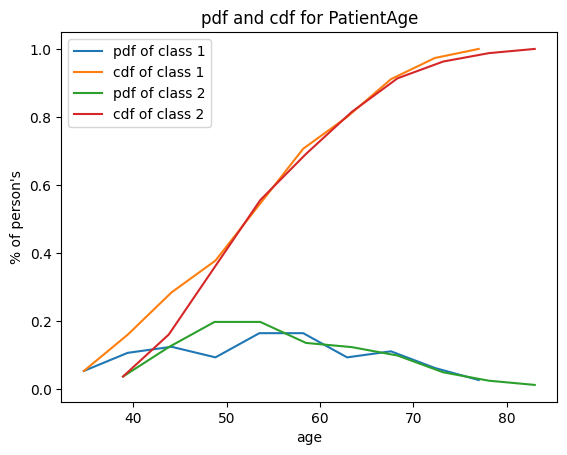

In [ ]:
one = df.loc[df["SurvivalStatus"] == 1]
two = df.loc[df["SurvivalStatus"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["PatientAge"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for PatientAge")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["PatientAge"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

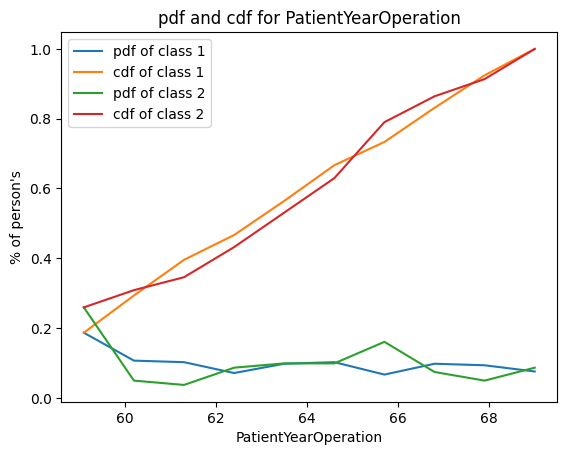

In [ ]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["PatientYearOperation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["PatientYearOperation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for PatientYearOperation")
plt.xlabel("PatientYearOperation")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();



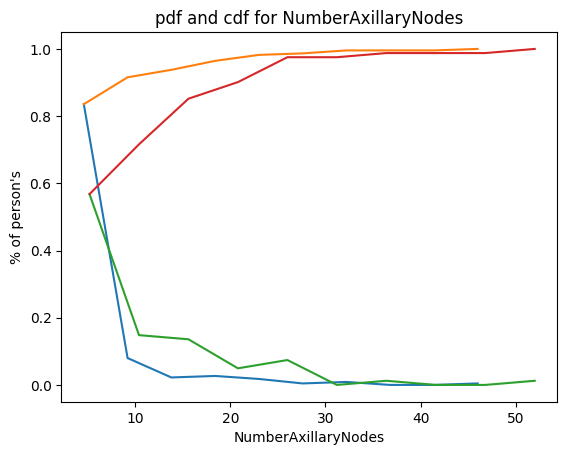

In [ ]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["NumberAxillaryNodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["NumberAxillaryNodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for NumberAxillaryNodes")
plt.xlabel("NumberAxillaryNodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();


Observations

1 .15% of the person's have less than or equal to age 37 who survived.

2 .perosons' who has more than 46 NumberAxillaryNodes not survived.


**Box Plot**

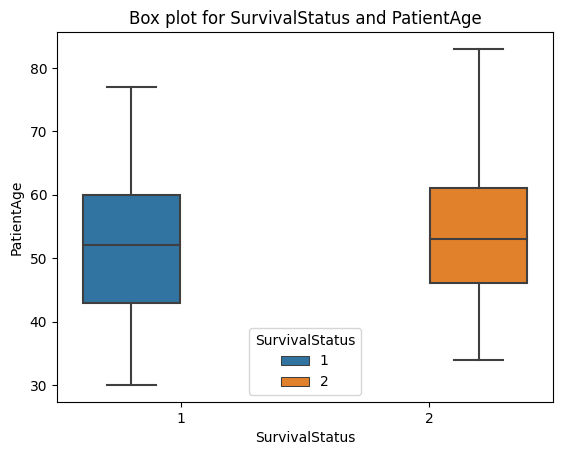

In [ ]:
sn.boxplot(x = "SurvivalStatus", y = "PatientAge", hue = "SurvivalStatus", data = df).set_title("Box plot for SurvivalStatus and PatientAge")
plt.show()


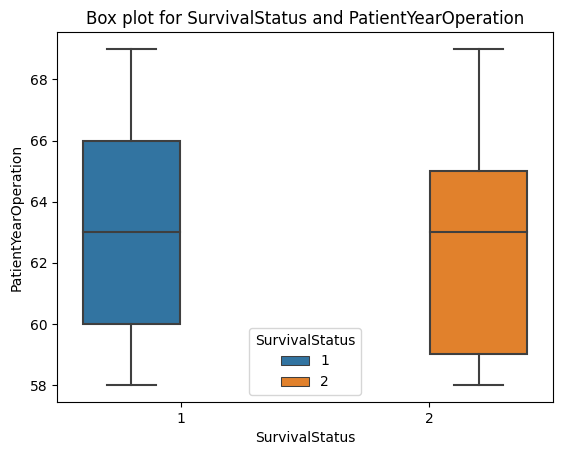

In [ ]:
sn.boxplot(x = "SurvivalStatus", y = "PatientYearOperation", hue = "SurvivalStatus", data = df).set_title("Box plot for SurvivalStatus and PatientYearOperation")
plt.show()


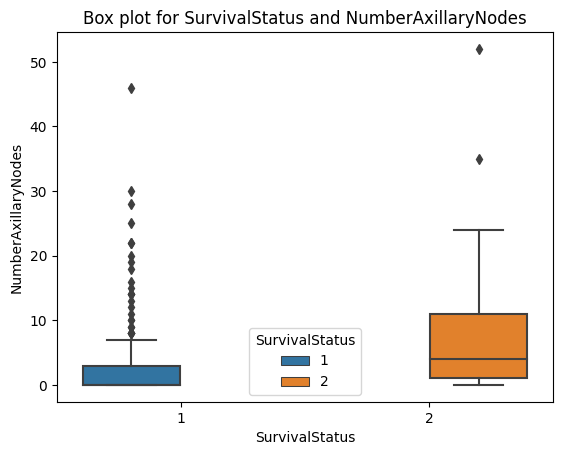

In [ ]:
sn.boxplot(x = "SurvivalStatus", y = "NumberAxillaryNodes", hue = "SurvivalStatus", data = df).set_title("Box plot for SurvivalStatus and NumberAxillaryNodes")
plt.show()


**Violin Plot**

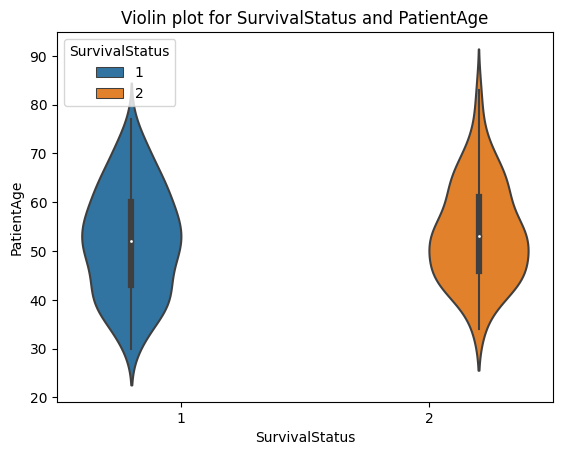

In [ ]:
sn.violinplot(x = "SurvivalStatus", y = "PatientAge", hue = "SurvivalStatus", data = df)
plt.title("Violin plot for SurvivalStatus and PatientAge")
plt.show()


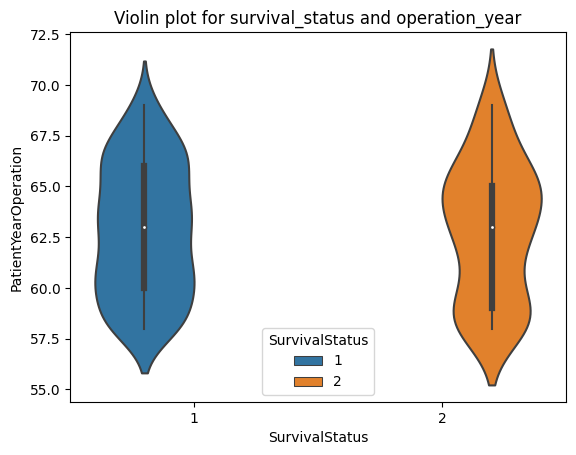

In [ ]:
sn.violinplot(x = "SurvivalStatus", y = "PatientYearOperation", hue = "SurvivalStatus", data = df)
plt.title("Violin plot for survival_status and PatientYearOperation")
plt.show()

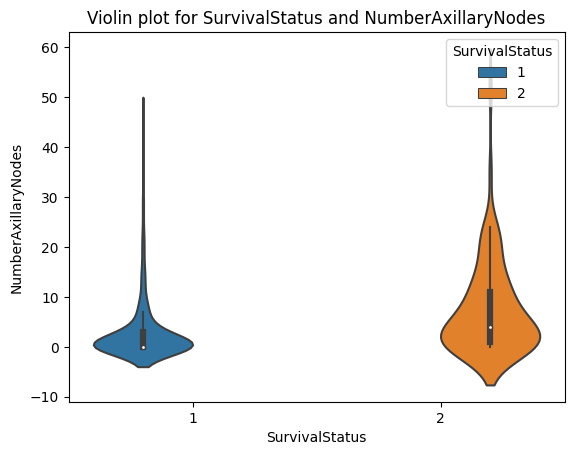

In [ ]:
sn.violinplot(x = "SurvivalStatus", y = "NumberAxillaryNodes", hue = "SurvivalStatus", data = df)
plt.title("Violin plot for SurvivalStatus and NumberAxillaryNodes")
plt.show()


# **Bivariate Analysis**

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

**Scatter Plot**

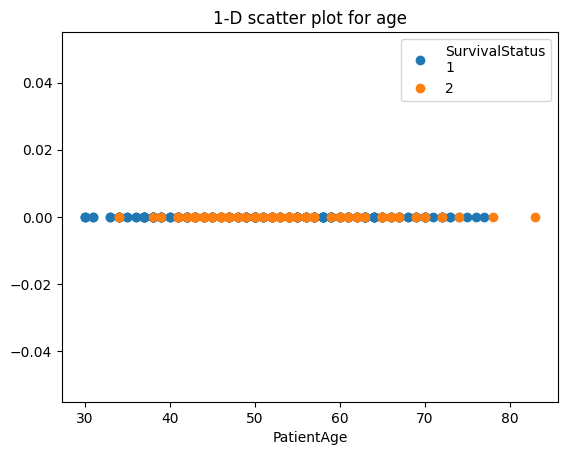

In [ ]:
# 1-d scatter plot

one = df.loc[df["SurvivalStatus"] == 1]
two = df.loc[df["SurvivalStatus"] == 2]
plt.plot(one["PatientAge"], np.zeros_like(one["PatientAge"]), 'o', label = "SurvivalStatus\n" "1")
plt.plot(two["PatientAge"], np.zeros_like(two["PatientAge"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("PatientAge")
plt.legend()
plt.show()



observations

1. After looking at this plot we can easily count number of points that are there in age range who survived or not.

2. Many person died whose age was between 41-70.


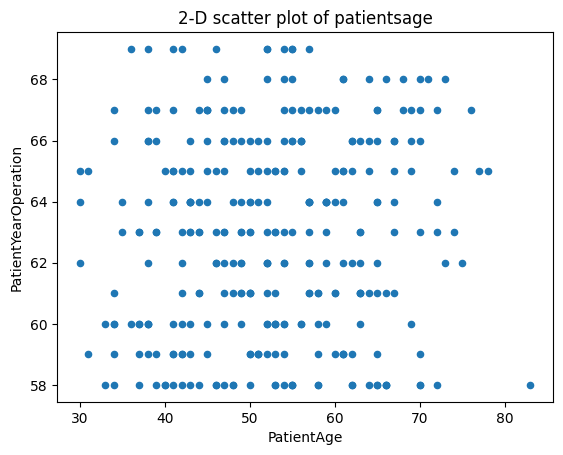

In [ ]:
# 2-d scatter plot

df.plot(kind = "scatter", x = "PatientAge", y = "PatientYearOperation")
plt.title("2-D scatter plot of patientsage")
plt.show()


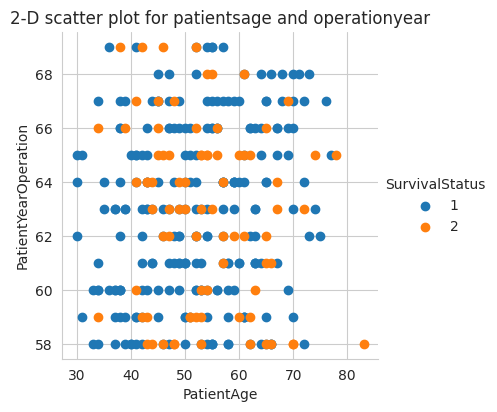

In [ ]:
# 2d scatter plot with color coding for each class

sn.set_style("whitegrid")
sn.FacetGrid(df, hue = "SurvivalStatus", height = 4).map(plt.scatter, "PatientAge", "PatientYearOperation").add_legend()
plt.title("2-D scatter plot for patientsage and operationyear")
plt.show()

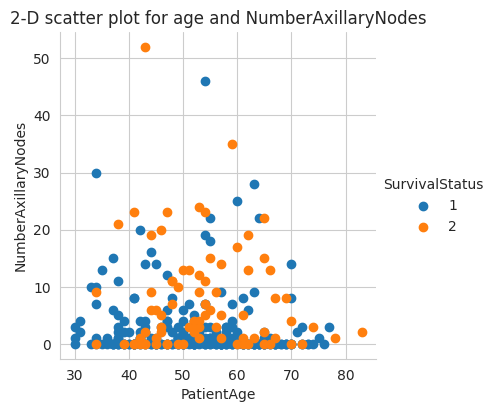

In [ ]:
sn.set_style("whitegrid")
sn.FacetGrid(df, hue = "SurvivalStatus", height= 4).map(plt.scatter, "PatientAge", "NumberAxillaryNodes").add_legend()
plt.title("2-D scatter plot for age and NumberAxillaryNodes")
plt.show()


observations

1. In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
2. 0-5 NumberAxillaryNodes person survived and died as well but the died ratio is less than survive ratio.


**Pair Plot**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


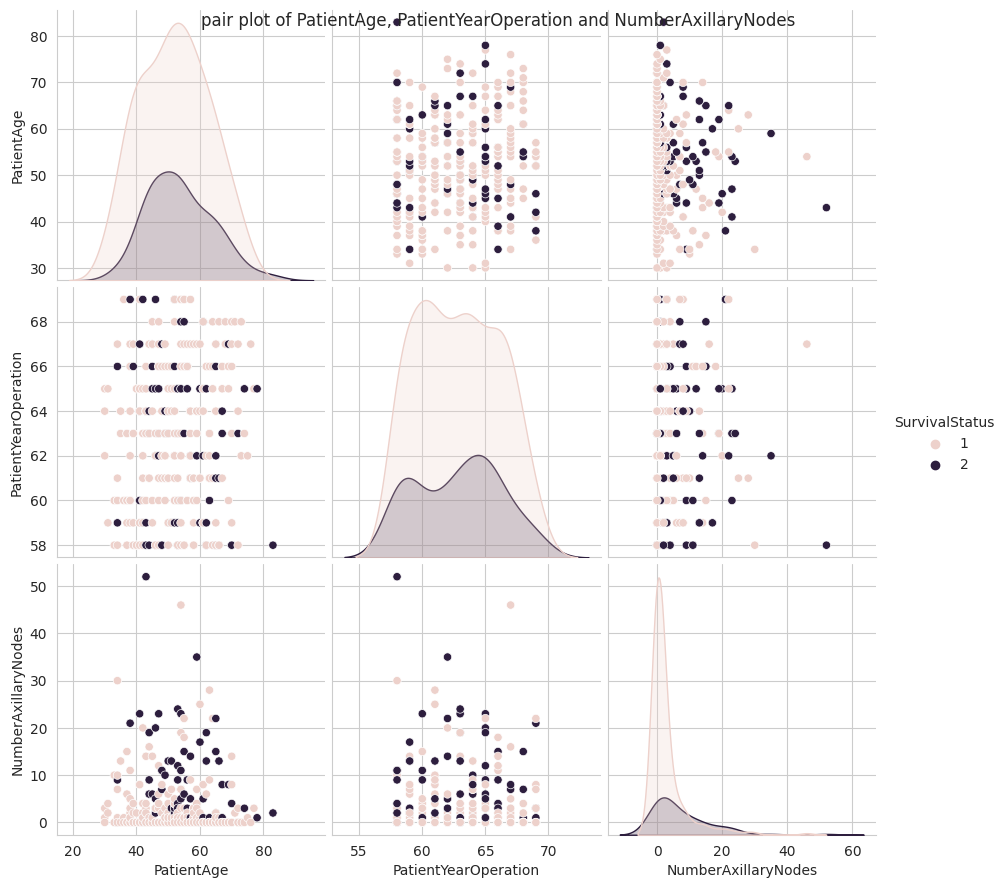

In [ ]:
sn.set_style("whitegrid")
sn.pairplot(df, hue = "SurvivalStatus", vars = ["PatientAge", "PatientYearOperation", "NumberAxillaryNodes"], size = 3)
plt.suptitle("pair plot of PatientAge, PatientYearOperation and NumberAxillaryNodes")
plt.show()


Observation

1. As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In PatientYearOperation, 60-65 more person died who has less than 6 NumberAxillaryNodes.
2. And hence, this plot is not much informative in this case.


Conclusion

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3. somehow NumberAxillaryNodes is giving some intution in the dataset.
4. we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset